<a href="https://colab.research.google.com/github/LaibaGabol/Arch-Technologies/blob/main/MNIST%20Digit%20Recognition%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn matplotlib gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00


In [2]:
from sklearn.datasets import fetch_openml

# Load MNIST (fetch_openml automatically downloads and caches it)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype('int')


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


In [6]:
# Use only first 10,000 for quick test
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_clf.fit(X_train_small, y_train_small)

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rf_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.9365
Confusion Matrix:
 [[ 967    0    0    2    0    2    5    1    3    0]
 [   0 1121    3    3    0    1    4    1    2    0]
 [  12    2  958   10    8    1    7   17   12    5]
 [   7    1   15  930    0   15    2   16   16    8]
 [   1    2    2    1  901    0   12    1    9   53]
 [  10    6    3   24    4  809   11    4   10   11]
 [   9    3    1    2   14    7  918    0    4    0]
 [   1   12   26    4    5    0    0  952    5   23]
 [   5    2    6   15    5   10   16    7  875   33]
 [   6    7    2   11   20    4    2    8   15  934]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.93      0.92      0.92      1010
           4       0.94      0.92      0.93       982
           5       0.95      0.91      0.93       892
           6       0.94  

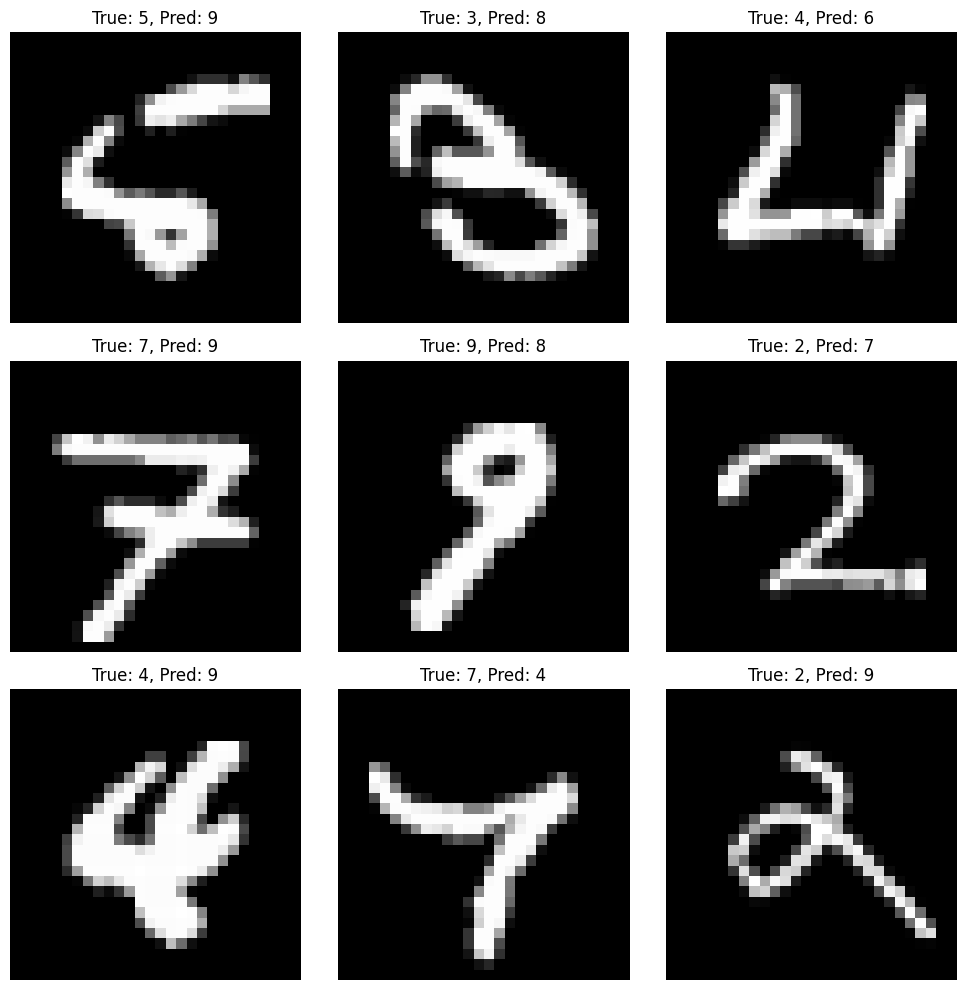

In [11]:
import numpy as np
import matplotlib.pyplot as plt

misclassified_idx = np.where(y_test != y_pred)[0]

plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [15]:
def predict_digit_sketch(image):
    # image is a numpy array (default 280x280), resize to 28x28 inside function
    import cv2
    img_resized = cv2.resize(image, (28, 28))
    img_arr = img_resized.reshape(1, -1) / 255.0
    prediction = sgd_clf.predict(img_arr)
    return int(prediction[0])

interface = gr.Interface(
    fn=predict_digit_sketch,
    inputs=gr.Sketchpad(),  # no shape argument here
    outputs="label",
    title="MNIST Digit Classifier"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bfccecbdef35ed2489.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
